# Ensemble methods. Boosting


## AdaBoost

AdaBoost consists of following steps:
* initialize weights to $\frac{1}{N}$, where $N$ is the number of datapoints,
* loop until 
  $\varepsilon_{t}<\frac{1}{2}$
  or maximum number of iteration is reached,

* train classifier on ${S,w^{(t)}}$ and get a hypothesis $h_{t}(x_{n})$ for datapoints $x_{n}$,

* compute error $\varepsilon_{t}=\sum_{n=1}^{N}w_{n}^{(t)}I(y_{n}\neq h_{t}(x_{n}))$,       

* set $\alpha_{t}=\log(\frac{1-\varepsilon_{t}}{\varepsilon_{t}})$.
  
* update weights $w_{n}^{(t+1)}=\frac{w_{n}^{(t)}\exp{\alpha_{t}I(y_{n}\neq h_{t}(x_{n}))}}{Z_{t}}$,
  where $Z_{t}$ is a normalization constant,

* output $f(X)=\text{sign}(\sum_{t=1}^{T}\alpha_{t}h_{t}(x))$.
  
Example taken from Marsland, Machine Learning: https://seat.massey.ac.nz/personal/s.r.marsland/MLBook.html.


First, we need to import libraries:

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

Variables that are used by the classifier:

In [8]:
# Retrieve stored variables from previous notebooks
%store -r data_set
%store -r labels
%store -r test_data_set
%store -r test_labels

In [21]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split

# Make sure we're using arrays, not scalar values
if np.isscalar(labels) or (hasattr(labels, "shape") and len(labels.shape) == 0):
    # If labels is a scalar, we need to create proper data from iris dataset
    iris = load_iris()
    data_set = iris.data
    labels_array = iris.target
    
    # Use train_test_split to create proper training and testing sets
    train_set, test_set, train_labels, test_labels = train_test_split(
        data_set, labels_array, test_size=0.2, random_state=42)
else:
    # Use the loaded data from store
    train_set = data_set
    test_set = test_data_set
    train_labels = labels.copy()  # Using copy to avoid modifying original
    test_labels = test_labels.copy()

# Just for verification
print(f"Train set shape: {train_set.shape}")
print(f"Train labels shape: {train_labels.shape}")

Train set shape: (120, 4)
Train labels shape: (120,)


Weights initialization:

In [22]:
number_of_iterations = 10
weights = np.ones((len(test_set),)) / len(test_set)

The data set looks as:

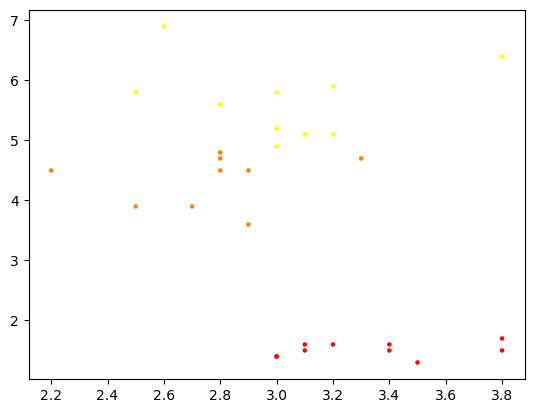

In [23]:
import matplotlib.pyplot as plt

sizes = np.ones(len(test_set))*5

plt.scatter(test_set[:, 1], test_set[:, 2], c=test_labels, s=sizes, cmap='autumn')
plt.show()

In [24]:
def train_model(classifier, weights):
    return classifier.fit(X=test_set, y=test_labels, sample_weight=weights)

Accuracy vector calculation for the weights: 0 - don't change the weight, 1 - change it.

In [25]:
def calculate_accuracy_vector(predicted, labels):
    result = []
    for i in range(len(predicted)):
        if predicted[i] == labels[i]:
            result.append(0)
        else:
            result.append(1)
    return result

Calculate the error rate $\varepsilon_{t}=\sum_{n=1}^{N}w_{n}^{(t)}I(y_{n}\neq h_{t}(x_{n}))$:

In [26]:
def calculate_error(weights, model):
    predicted = model.predict(test_set)
    return np.dot(weights,calculate_accuracy_vector(predicted, test_labels))

Calculate the $\alpha_{t}=\log(\frac{1-\varepsilon_{t}}{\varepsilon_{t}})$:

In [27]:
def set_alpha(error_rate):
    return np.log((1-error_rate)/error_rate)

Calculate the new weights $w_{n}^{(t+1)}=\frac{w_{n}^{(t)}\exp{\alpha_{t}I(y_{n}\neq h_{t}(x_{n}))}}{Z_{t}}$:

In [28]:
def set_new_weights(old_weights, alpha, model):
    new_weights = old_weights * np.exp(np.multiply(alpha,calculate_accuracy_vector(model.predict(test_set), test_labels)))
    Zt = np.sum(new_weights)
    return new_weights / Zt

Now, it's time to run the code and check the weights:

In [29]:
classifier = DecisionTreeClassifier(max_depth=1, random_state=1)
classifier.fit(X=train_set, y=train_labels)
alphas = []
classifiers = []
for iteration in range(number_of_iterations):
    model = train_model(classifier, weights)
    error_rate = calculate_error(weights, model)
    alpha = set_alpha(error_rate)
    weights = set_new_weights(weights, alpha, model)
    alphas.append(alpha)
    classifiers.append(model)

print(weights)

[0.05555556 0.01909745 0.02809323 0.05555556 0.05555556 0.01909745
 0.05555556 0.02809323 0.05555556 0.05555556 0.02809323 0.01909745
 0.01909745 0.01909745 0.01909745 0.05555556 0.02809323 0.05555556
 0.05555556 0.02809323 0.01909745 0.02809323 0.01909745 0.02809323
 0.02809323 0.02809323 0.02809323 0.02809323 0.01909745 0.01909745]


In [30]:
weights = (weights/np.min(weights))*2

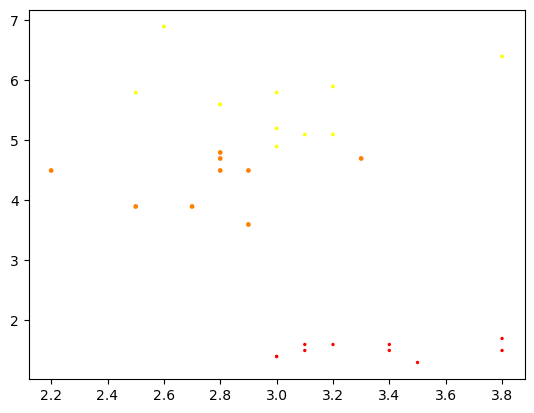

In [31]:
plt.scatter(test_set[:, 1], test_set[:, 2], c=test_labels, s=weights, cmap='autumn')


plt.show()